In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify as mc

In [ ]:
pop23 = gpd.read_file('https://raw.githubusercontent.com/dataandcrowd/GISCI343/main/docs/Lecture5/data/pop23.gpkg')

In [28]:
pop23.head(2)

,REGC2023_V,REGC2023_1,REGC2023_2,VAR_1_1,VAR_1_2,VAR_1_3,VAR_1_4,VAR_1_5,VAR_1_6,VAR_1_7,...,VAR_1_39,VAR_1_40,AREA_SQ_KM,LAND_AREA_,Shape_Leng,Island,geometry,centroid,distance_to_wellys,distance_to_wellys_km
0,13,Canterbury Region,Canterbury Region,448650,41910,12720,35847,4374,10236,539433,...,8.6,8.6,56773.925695,44503.596192,1.543745e+06,South,"MULTIPOLYGON (((1662227.733 5360071.829, 16623...",POINT (1504471.265 5175113.443),398067.935743,398.07
1,15,Southland Region,Southland Region,79731,11607,1917,2841,315,2031,93342,...,2.7,2.7,55237.978437,31218.954918,1.403398e+06,South,"MULTIPOLYGON (((1205425.608 5087372.120, 12055...",POINT (1192875.920 4894523.352),817370.466005,817.37


In [ ]:
pop23[['REGC2023_2']]

In [ ]:
pop23["centroid"] = pop23.centroid

In [ ]:
wellington = pop23[pop23["REGC2023_2"].str.contains("Wellington", case=False)]


In [ ]:
wellington_centroids = wellington.centroid.values[0]

In [ ]:
pop23["distance_to_wellys"] = pop23["centroid"].distance(wellington_centroids)
pop23["distance_to_wellys_km"] = round(pop23["distance_to_wellys"] / 1000, 2)
pop23[["centroid", "distance_to_wellys_km"]]

In [ ]:
# Create the figure/axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
pop23.plot(
    ax=ax,
    column="VAR_1_23",  # NEW: Specify the column to color polygons by
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    legend_kwds=dict(loc="lower right", fontsize=10),
    scheme="FisherJenks",
    cmap="viridis"
)

# Format
ax.set_title("Fisher Jenks: k = 5")
ax.set_axis_off()
ax.set_aspect("equal")

In [ ]:
pop23.explore(
    column="VAR_1_23",  # Similar to plot(); specify the value column
    cmap="viridis",  # What color map do we want to use
    tiles="CartoDB positron",  # What basemap tiles do we want to use?
)

In [30]:
dissolved = pop23.dissolve(by='Island').reset_index()

<Axes: >

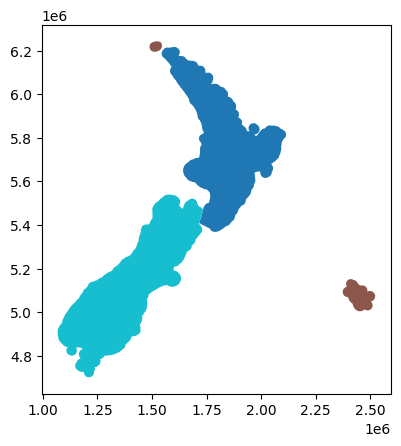

In [32]:
dissolved.plot(column = 'Island')

In [33]:
pop23["area"] = pop23.area

In [36]:
pop23['VAR_1_23']

0      651027
1      100143
2      240900
3       33390
4      498771
5      194007
6      251412
7      334140
8      175074
9       49431
10    1656486
11     520971
12      57807
13      51135
14     126015
15      52584
16        633
Name: VAR_1_23, dtype: int64

In [38]:
print(pop23[['VAR_1_23', 'area']].dtypes)

VAR_1_23      int64
area        float64
dtype: object


In [39]:
pop23['popden'] = pop23['VAR_1_23'] / pop23['area']

In [45]:
pop23[['REGC2023_2', 'popden']]

,REGC2023_2,popden
0,Canterbury Region,0
1,Southland Region,0
2,Otago Region,0
3,West Coast Region,0
4,Waikato Region,0
5,Northland Region,0
6,Manawatu-Whanganui Region,0
7,Bay of Plenty Region,0
8,Hawke's Bay Region,0
9,Marlborough Region,0


In [46]:
pop23['popden_str'] = pop23['popden'].apply(lambda x: f'{x:.2f}')


In [47]:
pop23

,REGC2023_V,REGC2023_1,REGC2023_2,VAR_1_1,VAR_1_2,VAR_1_3,VAR_1_4,VAR_1_5,VAR_1_6,VAR_1_7,...,LAND_AREA_,Shape_Leng,Island,geometry,centroid,distance_to_wellys,distance_to_wellys_km,area,popden,popden_str
0,13,Canterbury Region,Canterbury Region,448650,41910,12720,35847,4374,10236,539433,...,44504,1543745,South,"MULTIPOLYGON (((1662227.733 5360071.829, 16623...",POINT (1504471.265 5175113.443),398068,398,56773926371,0,0.00
1,15,Southland Region,Southland Region,79731,11607,1917,2841,315,2031,93342,...,31219,1403398,South,"MULTIPOLYGON (((1205425.608 5087372.120, 12055...",POINT (1192875.920 4894523.352),817370,817,55237980185,0,0.00
2,14,Otago Region,Otago Region,171618,14388,3933,10038,2043,4164,202470,...,31186,1277273,South,"MULTIPOLYGON (((1333232.513 5127595.855, 13332...",POINT (1340957.562 4969400.688),658409,658,38514351821,0,0.00
3,12,West Coast Region,West Coast Region,27438,3171,315,678,117,837,32148,...,23246,1582117,South,"MULTIPOLYGON (((1536071.582 5480250.380, 15361...",POINT (1413794.882 5265353.776),425872,426,36339586020,0,0.00
4,03,Waikato Region,Waikato Region,296097,83742,14700,26382,3561,6660,403641,...,23901,1268420,North,"MULTIPOLYGON (((1871103.957 5970628.885, 18712...",POINT (1814673.939 5812794.911),374339,374,34888829346,0,0.00
5,01,Northland Region,Northland Region,105057,44931,4461,3927,555,2565,151689,...,12507,811360,North,"MULTIPOLYGON (((1611941.312 6214121.225, 16133...",POINT (1666886.314 6089056.502),664465,664,30084271285,0,0.00
6,08,Manawatū-Whanganui Region,Manawatu-Whanganui Region,172101,43599,7341,10863,1335,4422,222672,...,22221,1176417,North,"MULTIPOLYGON (((1821624.069 5738734.422, 18233...",POINT (1818513.179 5588762.382),150937,151,25322188258,0,0.00
7,04,Bay of Plenty Region,Bay of Plenty Region,189597,68943,7728,12963,1266,4407,267741,...,12072,1093737,North,"MULTIPOLYGON (((1911825.034 5859943.054, 19127...",POINT (1939749.841 5798645.911),385165,385,21883740982,0,0.00
8,06,Hawke's Bay Region,Hawke's Bay Region,110940,34662,6270,5115,666,2763,151179,...,14139,928781,North,"MULTIPOLYGON (((1959613.233 5721027.670, 19722...",POINT (1941378.454 5626939.482),233783,234,21444154085,0,0.00
9,18,Marlborough Region,Marlborough Region,37041,4776,969,1182,246,1044,43416,...,10458,766970,South,"MULTIPOLYGON (((1729284.900 5448401.834, 17269...",POINT (1665073.201 5409294.375),140835,141,17688824208,0,0.00
